In [4]:
%matplotlib inline

# pandas_datareader
* http://pandas.pydata.org/pandas-docs/stable/remote_data.html
* https://github.com/pydata/pandas-datareader

    $ sudo pip install pandas_datareader

In [5]:
from pandas_datareader import data
import datetime

# Yahoo Finance

In [6]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2015, 12, 31)

df = data.DataReader("005930.KS", 'yahoo', start, end)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,1327000,1327000,1327000,1327000,0,1305014.42
2015-01-02,1340000,1340000,1327000,1330000,175400,1307964.71
2015-01-05,1336000,1336000,1313000,1333000,202700,1310915.01
2015-01-06,1315000,1317000,1288000,1295000,304700,1273544.59
2015-01-07,1294000,1311000,1282000,1307000,286400,1285345.77


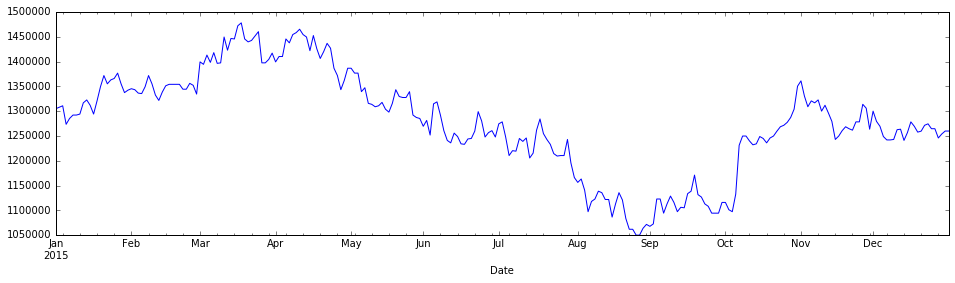

In [7]:
df['Adj Close'].plot(figsize=(16,4))

# 원/달러 환율

https://research.stlouisfed.org/fred2/series/DEXKOUS

* DEXKOUS - Daily Exchange KO-US
* EXKOUS - Monthly Exchange KO-US
* AEXKOUS - Annual Exchange KO-US

In [8]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_kous = data.DataReader("DEXKOUS", 'fred', start, end)
df_kous.head(10)

,DEXKOUS
DATE,
2015-01-01,NaN
2015-01-02,1103.73
2015-01-05,1109.07
2015-01-06,1098.14
2015-01-07,1101.51
2015-01-08,1096.19
2015-01-09,1086.14
2015-01-12,1083.25
2015-01-13,1080.42


# 2015년 원/달러 환율 추이

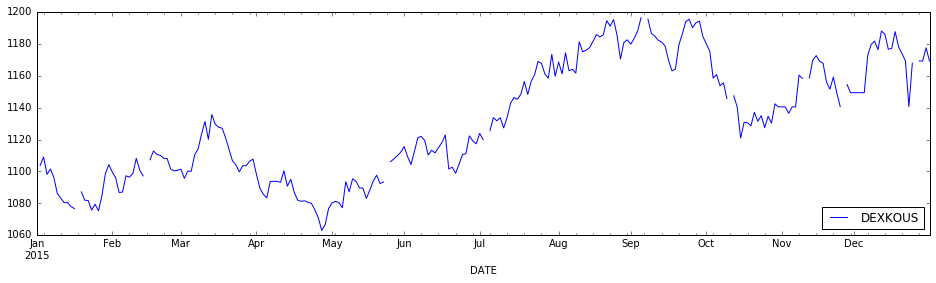

In [20]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_kous = data.DataReader("DEXKOUS", 'fred', start, end)
df_kous.plot(figsize=(16,4))

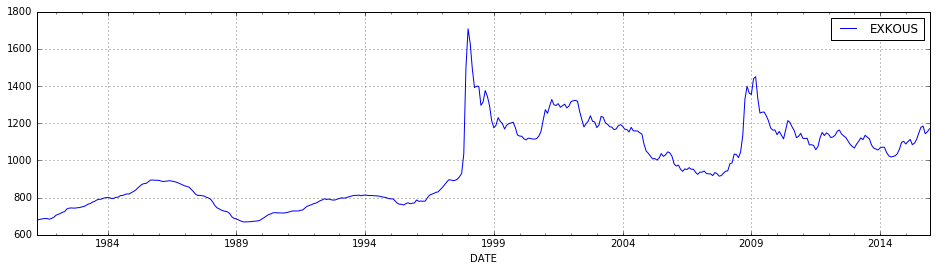

In [10]:
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_kous = data.DataReader("EXKOUS", 'fred', start, end)
df_kous.plot(figsize=(16,4), grid=True)

# 달러 환율

https://research.stlouisfed.org/fred2/series/DEXUSEU

* DEXUSEU - Daily US / EU
* DEXCHUS - Daily China / US
* DEXJPUS - Daily Japan / US

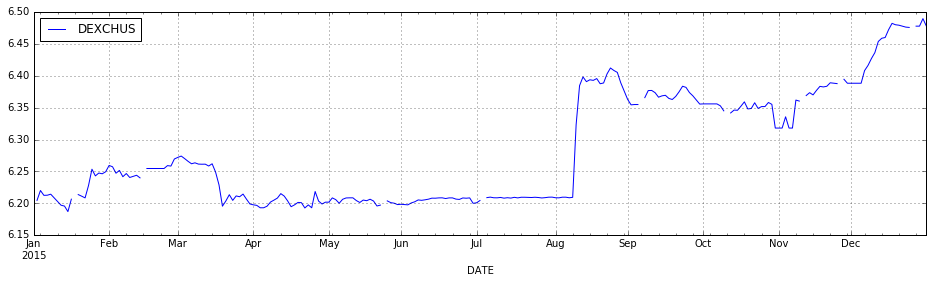

In [11]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_chus = data.DataReader("DEXCHUS", 'fred', start, end)
df_chus.plot(figsize=(16,4), grid=True)

http://goo.gl/0WbSoO 중국, 위안화 평가절하… 기준 환율 1.9% 상승

# 한국, 소비자 물가 지수

* https://research.stlouisfed.org/fred2/series/KORCPIALLMINMEI
* 2010년을 100으로 481개 조사항목을 가중평균하여 매월 지수를 산출

## 부문별 소비자 물가 지수
* KORCPIALLMINMEI : CPI (All Items)
* KORCPIHOUMINMEI : CPI (Housing)
* KORCPIENGMINMEI : CPI (Energy)
* KORCPIFODMINMEI : CPI (Food)
    

In [12]:
inx_codes = ["KORCPIALLMINMEI", "KORCPIHOUMINMEI", "KORCPIFODMINMEI", "KORCPIENGMINMEI"]
inx_regend = ["All", "Housing", "Food", "Energy"]

start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_cpi = data.DataReader(inx_codes, 'fred', start, end)
df_cpi.columns = inx_regend
df_cpi.head()

,All,Housing,Food,Energy
DATE,,,,
1991-01-01,46.737666,57.367404,39.430155,30.061427
1991-02-01,47.361332,57.838272,40.437955,30.061427
1991-03-01,47.940398,58.152184,41.004842,30.061427
1991-04-01,48.163397,58.701530,41.382767,30.061427
1991-05-01,48.297197,59.721743,40.878867,30.128082


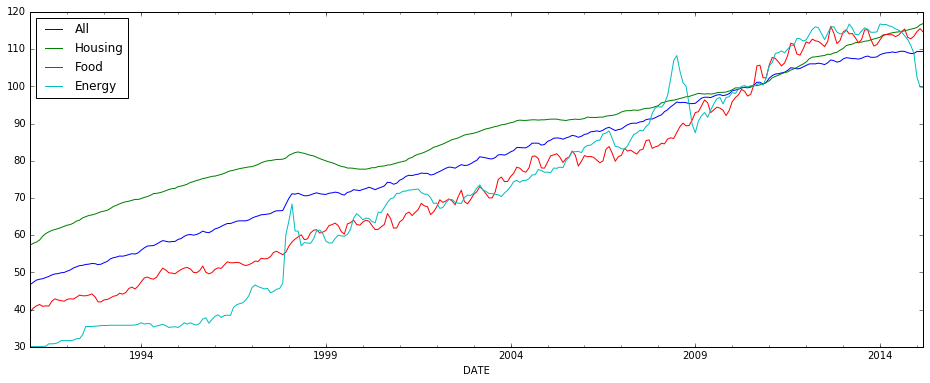

In [19]:
df_cpi.plot(figsize=(16,6))

# GDP
* 일정 기간 동안 한 국민 경제 내에서 생산된 최종재의 시장 가치
* Real GDP: 실질 GDP, 물가 인상분이 반영된 GDP
* Real GDP per Capita: 1인당 실질 GDP

https://research.stlouisfed.org/fred2/series/KORRGDPC
* KORRGDPR 한국 실질 GDP
* KORRGDPC 한국 Real GDP per Capita (1인당 실질 GDP)
* MKTGDPKRA646NWDB 한국 GDP
* MKTGDPCNA646NWDB 중국 GDP

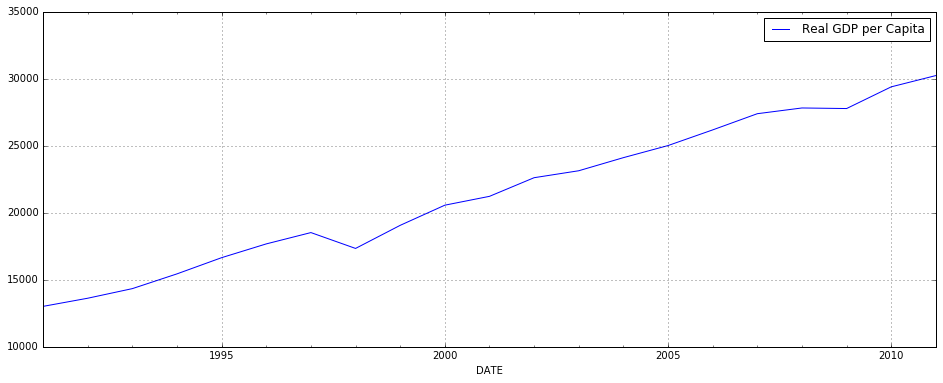

In [31]:
inx_codes = ['KORRGDPC']
inx_regend = ['Real GDP per Capita']

start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_gdp = data.DataReader(inx_codes, 'fred', start, end)
df_gdp.columns = inx_regend
df_gdp.plot(figsize=(16,6), grid=True)

http://goo.gl/ecQprV 올해 1인당 국민소득 3만弗 육박…원화강세 등 효과 (2014-04-19)

# 실질 GDP,  1인당 실질 GDP 비교

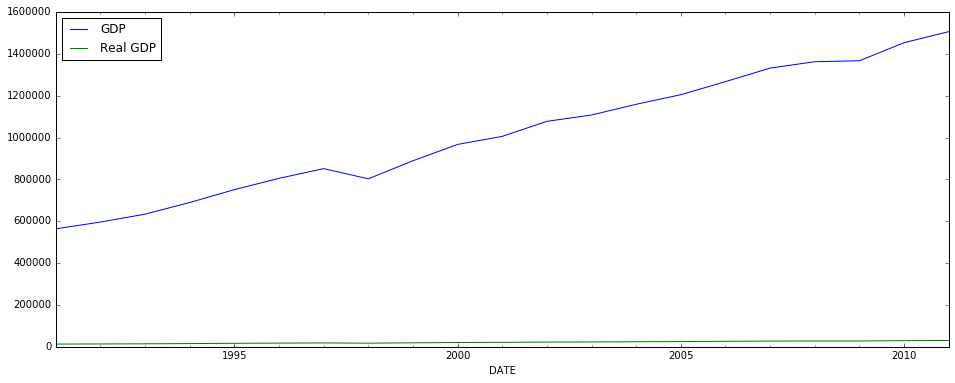

In [32]:
# KORRGDPR 실질 GDP,  KORRGDPC 1인당 실질 GDP
inx_codes = ['KORRGDPR', "KORRGDPC"]
inx_regend = ['GDP', "Real GDP"]

start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_gdp = data.DataReader(inx_codes, 'fred', start, end)
df_gdp.columns = inx_regend
df_gdp.plot(figsize=(16,6))

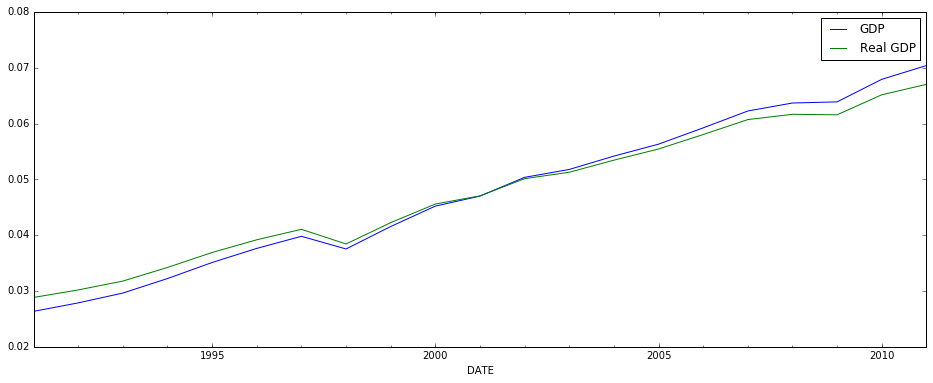

In [27]:
df_gdp_ratio = df_gdp / df_gdp.sum()
df_gdp_ratio.columns = inx_regend
df_gdp_ratio.plot(figsize=(16,6))

# GDP 대비 가계부채
* https://research.stlouisfed.org/fred2/series/HDTGPDKRQ163N
* HDTGPDKRQ163N Household Debt to GDP for Republic of Korea


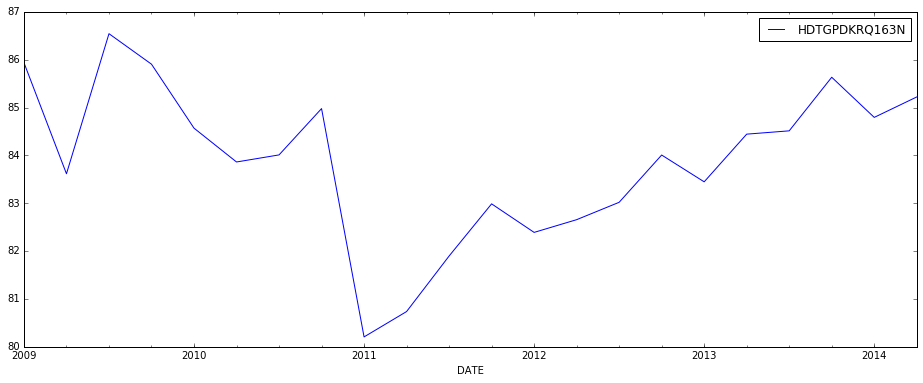

In [33]:
start = datetime.datetime(1991, 1, 1)
end = datetime.datetime(2015, 12, 31)

df_gdp_debt = data.DataReader(['HDTGPDKRQ163N'], 'fred', start, end)
df_gdp_debt.plot(figsize=(16,6))

http://goo.gl/9c7805 한국 GDP 대비 가계부채 비율 신흥국 최고 수준 (2015-09-15)